# Attention Architecture

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import bert

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [3]:
path = Path('data/composers/notewise/piano_solo/note_range62/sample_freq12')

In [4]:
bs=16
bptt=250

In [5]:
data = TextLMDataBunch.load(path, bs=bs, bptt=bptt)

In [6]:
vocab = data.train_ds.vocab
vocab_size = len(vocab.itos); vocab_size

158

In [13]:
t = data.train_ds[0][0]
t.text[:50], t.data

('xxbos wait25 wait25 wait25 wait25 wait25 wait25 wa',
 array([  2, 124, 124, 124, ...,   9, 105,   9, 157]))

In [ ]:
# data.show_batch()

## Sanity - make sure outputs match

In [7]:
# learn = language_model_learner(data, drop_mult=1, clip=.5, bptt=250)

# ob = data.one_batch()

# out = learn.model(ob[0].cuda())

# out[0].shape

# len(out[1])

### Transformer Arch
Paper: https://arxiv.org/abs/1706.03762  
Inspiration: https://github.com/jadore801120/attention-is-all-you-need-pytorch

In [8]:
config = bert.BertConfig(vocab_size)

In [9]:
model = bert.BertForPreTraining(config).cuda()
model.reset = lambda: None

In [ ]:
# model

In [15]:
# ob = data.one_batch(); ob[0].shape

# out = model(ob[0].cuda())

# len(out)

# out[1].shape

# out[0].shape

### Create Language learner

In [10]:
learn = LanguageLearner(data, model, bptt)

In [11]:
learn.callbacks = []

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


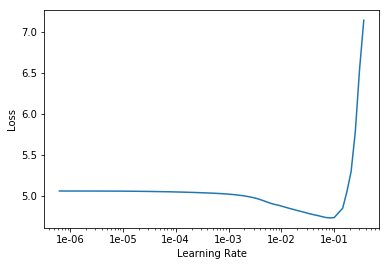

In [13]:
learn.recorder.plot()

## Must remeber that BERT is bidirectional, so we must modifythe architechture so it won't cheat

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy


In [25]:
%debug

> /home/ubuntu/anaconda3/envs/musical_neural_net/lib/python3.7/site-packages/fastai-1.0.40.dev0-py3.7.egg/fastai/callbacks/rnn.py(27)on_loss_begin()
     25     def on_loss_begin(self, last_output:Tuple[Tensor,Tensor,Tensor], **kwargs):
     26         "Save the extra outputs for later and only returns the true output."
---> 27         self.raw_out,self.out = last_output[1],last_output[2]
     28         return last_output[0]
     29 

ipdb> out.shape
*** NameError: name 'out' is not defined
ipdb> up
> /home/ubuntu/anaconda3/envs/musical_neural_net/lib/python3.7/site-packages/fastai-1.0.40.dev0-py3.7.egg/fastai/callback.py(216)on_loss_begin()
    214         self.state_dict['last_output'] = out
    215         for cb in self.callbacks:
--> 216             a = cb.on_loss_begin(**self.state_dict)
    217             if a is not None: self.state_dict['last_output'] = a
    218         return self.state_dict['last_output']

ipdb> up
> /home/ubuntu/anaconda3/envs/musical_neural_net/lib/pyth